In [1]:
!pip install nltk


In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

In [6]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
data = pd.read_csv('DoctorReview.csv')

In [8]:
data

,Unnamed: 0,reviews,labels,tag
0,93,he explained initially that it takes 4-5 sitin...,0,negative
1,33,great dr definitely recommend he recommends le...,1,positive
2,129,doctor came and spent 9 seconds and recommende...,0,negative
3,7,i am completely satisfied with the consultatio...,1,positive
4,38,my experience was nice dr dyed was cool and co...,1,positive
...,...,...,...,...
138,110,dr is not ready to talk he writes for test and...,0,negative
139,71,doc just spent 3-5 minutes time to review on f...,0,negative
140,28,very friendly and his approach is also very go...,1,positive
141,119,overall had a very bad experience and the hosp...,0,negative


In [9]:
data.drop(columns=['labels'],inplace=True)

In [10]:
data.columns = ['SerialNumber','Reviews','GivenTag']

In [11]:
data

,SerialNumber,Reviews,GivenTag
0,93,he explained initially that it takes 4-5 sitin...,negative
1,33,great dr definitely recommend he recommends le...,positive
2,129,doctor came and spent 9 seconds and recommende...,negative
3,7,i am completely satisfied with the consultatio...,positive
4,38,my experience was nice dr dyed was cool and co...,positive
...,...,...,...
138,110,dr is not ready to talk he writes for test and...,negative
139,71,doc just spent 3-5 minutes time to review on f...,negative
140,28,very friendly and his approach is also very go...,positive
141,119,overall had a very bad experience and the hosp...,negative


In [12]:
data = data.sort_values(by='SerialNumber')

In [13]:
data

,SerialNumber,Reviews,GivenTag
40,0,just ten minutes of waiting period was observe...,positive
77,1,i visited him only once and the outcome was go...,positive
12,2,i felt a lot better after the treatment though...,positive
80,3,i would recommend everyone for the samealways ...,positive
128,4,explanation and gives minimum medicinereliable...,positive
...,...,...,...
103,138,doctor said it is done in my experience with t...,negative
110,139,no minimum diagnosis straight away he preferre...,negative
78,140,my mother has visited the doctor because of he...,negative
20,141,no value not satisfied after waiting for 1 hou...,negative


In [14]:
sid = SentimentIntensityAnalyzer()

In [15]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

In [16]:
def analyze_sentiment(Reviews):
    cleaned_review = preprocess_text(Reviews)
    sentiment_score = sid.polarity_scores(cleaned_review)['compound']

    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [17]:
data['NewTag'] = data['Reviews'].apply(analyze_sentiment)

In [18]:
data.to_csv('SentimentAnalysis.csv', index=False)

In [19]:
Final = pd.read_csv('SentimentAnalysis.csv')

In [20]:
Final

,SerialNumber,Reviews,GivenTag,NewTag
0,0,just ten minutes of waiting period was observe...,positive,Positive
1,1,i visited him only once and the outcome was go...,positive,Positive
2,2,i felt a lot better after the treatment though...,positive,Positive
3,3,i would recommend everyone for the samealways ...,positive,Positive
4,4,explanation and gives minimum medicinereliable...,positive,Positive
...,...,...,...,...
138,138,doctor said it is done in my experience with t...,negative,Positive
139,139,no minimum diagnosis straight away he preferre...,negative,Positive
140,140,my mother has visited the doctor because of he...,negative,Neutral
141,141,no value not satisfied after waiting for 1 hou...,negative,Positive


In [21]:
GivenTag = Final['GivenTag'].str.lower()
NewTag = Final['NewTag'].str.lower()

In [22]:
Final['TagDiff'] = GivenTag != NewTag

In [23]:
print("Reviews with Different Tags:")
DifferentTag = (Final[Final['TagDiff']][['GivenTag', 'NewTag','Reviews']])
print(DifferentTag)


Reviews with Different Tags:
     GivenTag    NewTag                                            Reviews
12   positive  Negative  he says the problem to the point problem ident...
13   positive  Negative  very friendly and decent explanation of illnes...
17   positive  Negative  from the endoscopy got to know i have infected...
21   positive   Neutral  last time my self i was effected with bell’s p...
34   positive   Neutral  dr syed checks the patient thoroughly and the ...
35   positive  Negative  i have visited doctor several times for varied...
37   positive  Negative  he will go through the end of the problem and ...
47   positive   Neutral  i visited this clinic for acne and pigmentatio...
50   positive   Neutral  as soon as i told my concern instead of discus...
53   positive  Negative  it's a mixed experience- with facility and doc...
58   positive   Neutral  treatment along with behavior with patient is ...
61   positive   Neutral  very humble and patient doctor patiently heard

In [24]:
Final

,SerialNumber,Reviews,GivenTag,NewTag,TagDiff
0,0,just ten minutes of waiting period was observe...,positive,Positive,False
1,1,i visited him only once and the outcome was go...,positive,Positive,False
2,2,i felt a lot better after the treatment though...,positive,Positive,False
3,3,i would recommend everyone for the samealways ...,positive,Positive,False
4,4,explanation and gives minimum medicinereliable...,positive,Positive,False
...,...,...,...,...,...
138,138,doctor said it is done in my experience with t...,negative,Positive,True
139,139,no minimum diagnosis straight away he preferre...,negative,Positive,True
140,140,my mother has visited the doctor because of he...,negative,Neutral,True
141,141,no value not satisfied after waiting for 1 hou...,negative,Positive,True


In [25]:
Final['GivenTag'] = GivenTag.str.capitalize()

In [26]:
Final

,SerialNumber,Reviews,GivenTag,NewTag,TagDiff
0,0,just ten minutes of waiting period was observe...,Positive,Positive,False
1,1,i visited him only once and the outcome was go...,Positive,Positive,False
2,2,i felt a lot better after the treatment though...,Positive,Positive,False
3,3,i would recommend everyone for the samealways ...,Positive,Positive,False
4,4,explanation and gives minimum medicinereliable...,Positive,Positive,False
...,...,...,...,...,...
138,138,doctor said it is done in my experience with t...,Negative,Positive,True
139,139,no minimum diagnosis straight away he preferre...,Negative,Positive,True
140,140,my mother has visited the doctor because of he...,Negative,Neutral,True
141,141,no value not satisfied after waiting for 1 hou...,Negative,Positive,True


In [27]:
DiffTagCount = Final['TagDiff'].sum()
print("\nTotal Count of Reviews with Different Tags:", DiffTagCount)


Total Count of Reviews with Different Tags: 58


In [28]:
TagCounts = NewTag.value_counts()

NeutralCount = TagCounts.get('neutral', 0)

print("Number of occurrences of 'neutral' in 'new_tags':", NeutralCount)

Number of occurrences of 'neutral' in 'new_tags': 17


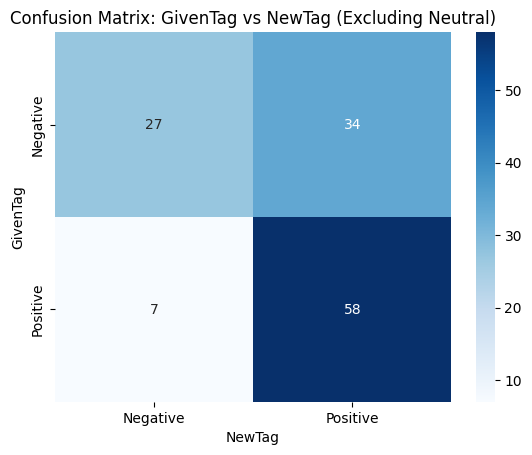

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Assuming 'Final' is your DataFrame with 'GivenTag' and 'NewTag' columns
Final_without_neutral = Final[(Final['GivenTag'] != 'Neutral') & (Final['NewTag'] != 'Neutral')]

given_tags = Final_without_neutral['GivenTag'].unique()
new_tags = Final_without_neutral['NewTag'].unique()

# Combine unique tags from both columns to get all unique categories
tag_categories = list(set(given_tags) | set(new_tags))

confusion_mat = confusion_matrix(Final_without_neutral['GivenTag'], Final_without_neutral['NewTag'], labels=tag_categories)

# Plot the confusion matrix using seaborn
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=tag_categories, yticklabels=tag_categories)
plt.xlabel('NewTag')
plt.ylabel('GivenTag')
plt.title('Confusion Matrix: GivenTag vs NewTag (Excluding Neutral)')
plt.show()
